In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
df= pd.read_csv("/workspaces/codespaces-jupyter/Copy of energy_production (1).csv", delimiter=";")

In [9]:
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [11]:
df.value_counts().sum()

9568

In [12]:
df.shape

(9568, 5)

In [13]:
df.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [14]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [15]:
df.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [16]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [17]:
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


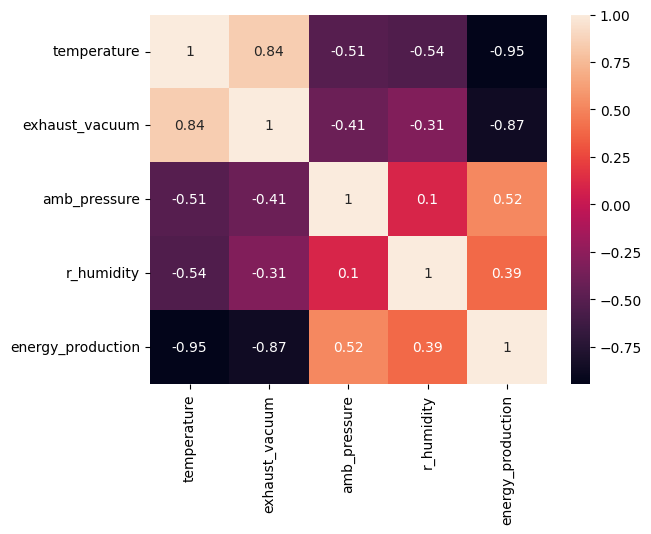

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()

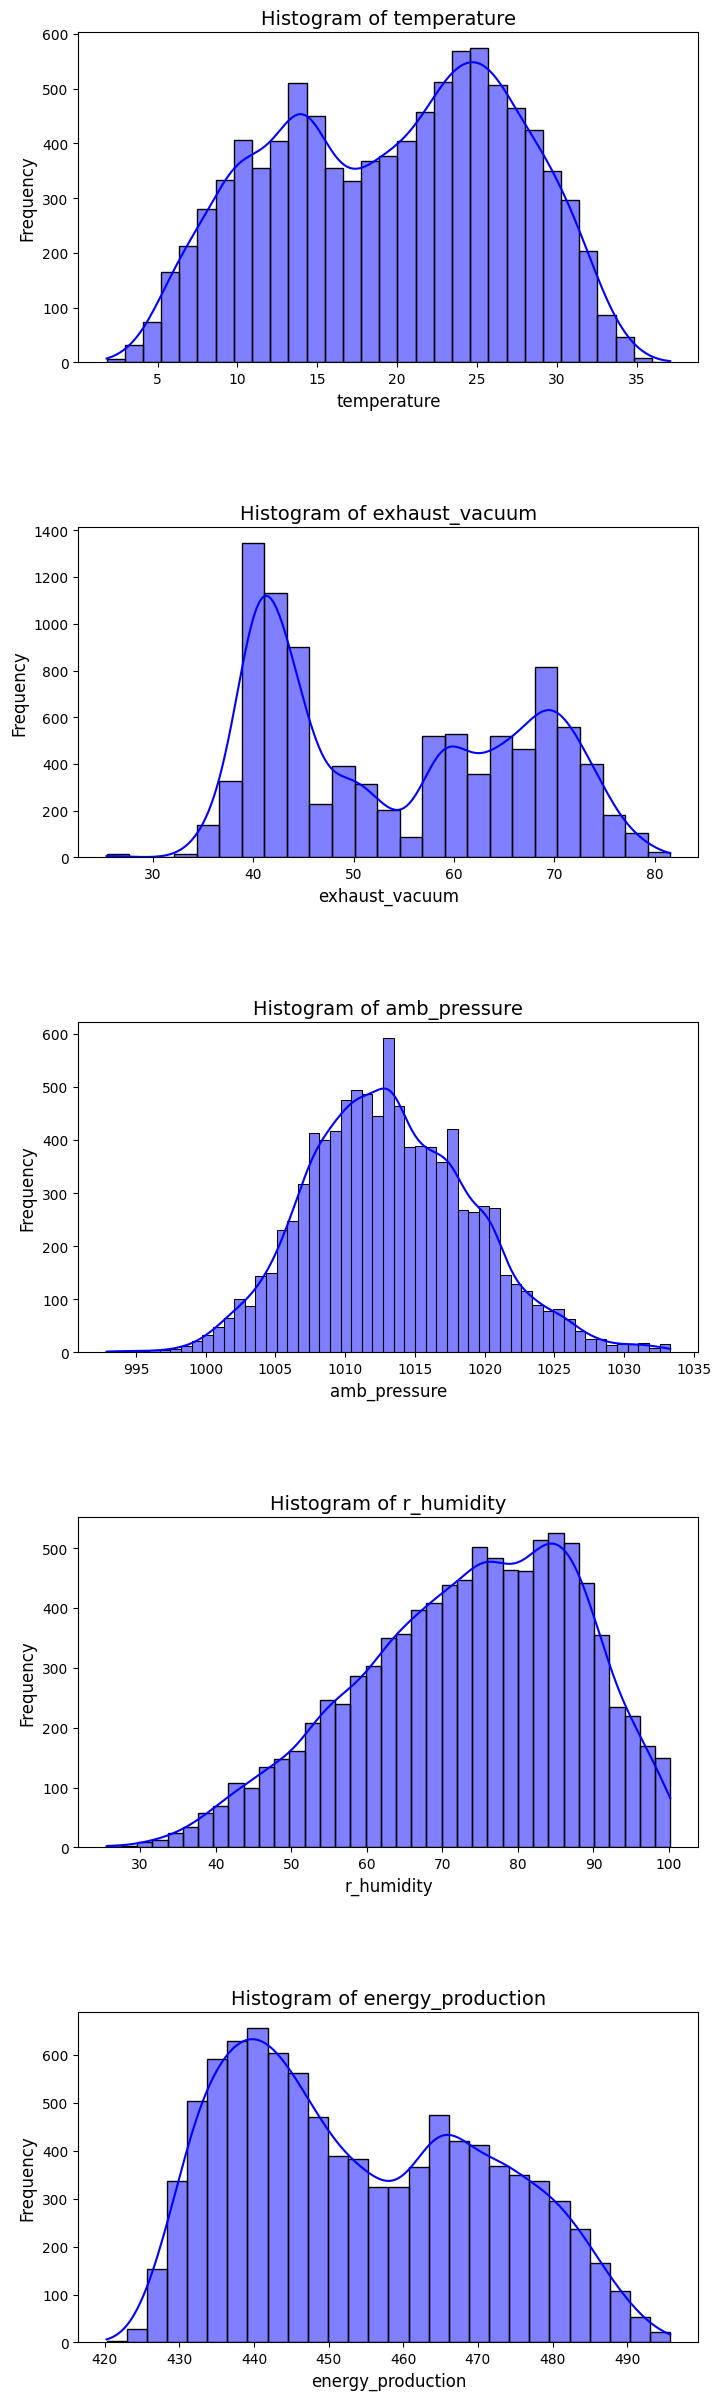

In [19]:
# Define the numerical variables
numerical_vars = ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity', 'energy_production']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=1, figsize=(8, 6 * len(numerical_vars)))
fig.subplots_adjust(hspace=0.5)

# Create histograms or kernel density plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df[var], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Histogram of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.show()

In [20]:
df[['energy_production', 'exhaust_vacuum']].corr().iloc[0, 1]

-0.8697803096577881

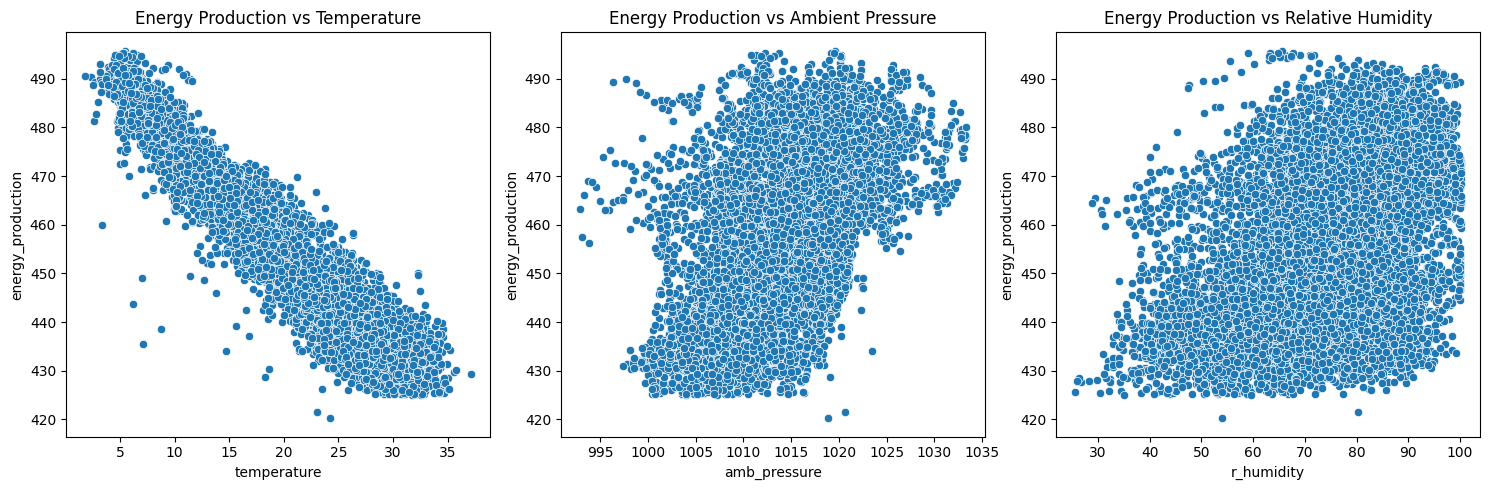

In [21]:
# Visualize the relationship between energy production and ambient variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='temperature', y='energy_production', data=df, ax=axes[0])
axes[0].set_title('Energy Production vs Temperature')

sns.scatterplot(x='amb_pressure', y='energy_production', data=df, ax=axes[1])
axes[1].set_title('Energy Production vs Ambient Pressure')

sns.scatterplot(x='r_humidity', y='energy_production', data=df, ax=axes[2])
axes[2].set_title('Energy Production vs Relative Humidity')

plt.tight_layout()
plt.show()

In [22]:
data=df.copy()
data=data.rename({"temperature":'tem',"exhaust_vacuum":'exh_vac',"amb_pressure":'pressure',"r_humidity":'humidity',"energy_production":'energy_prod'},axis=1)
data.head()

,tem,exh_vac,pressure,humidity,energy_prod
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [23]:
data.duplicated().sum()

41

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Normalization (Min-Max scaling)
scaler = MinMaxScaler()
data= pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [26]:
data.head(10)

,tem,exh_vac,pressure,humidity,energy_prod
0,0.220397,0.234875,0.596882,0.463003,0.808477
1,0.289802,0.302135,0.663945,0.926408,0.597351
2,0.341643,0.350890,0.780252,0.752413,0.598940
3,0.337394,0.514947,0.618659,0.717426,0.619735
4,0.377620,0.432028,0.764415,0.662735,0.573775
5,0.618130,0.632918,0.334571,0.770777,0.260132
6,0.600000,0.634520,0.420440,0.750670,0.272715
7,0.312748,0.260498,0.569166,0.580295,0.575894
8,0.795184,0.760142,0.451621,0.405094,0.120132
9,0.606516,0.733096,0.237070,0.802011,0.223179


In [27]:
data.tail(10)

,tem,exh_vac,pressure,humidity,energy_prod
9558,0.283286,0.273843,0.575105,0.785255,0.754437
9559,0.366006,0.266726,0.451868,0.531367,0.659205
9560,0.680737,0.779004,0.404108,0.843298,0.146887
9561,0.569122,0.672064,0.461519,0.754290,0.359470
9562,0.567705,0.685053,0.674833,0.580161,0.335894
9563,0.433144,0.432918,0.312794,0.754155,0.490861
9564,0.649292,0.711388,0.557535,0.365147,0.353113
9565,0.811048,0.549466,0.304380,0.411260,0.120265
9566,0.600283,0.724021,0.685969,0.733646,0.017351
9567,0.451558,0.425089,0.692155,0.510858,0.452318


In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data.shape

(9527, 5)

In [30]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


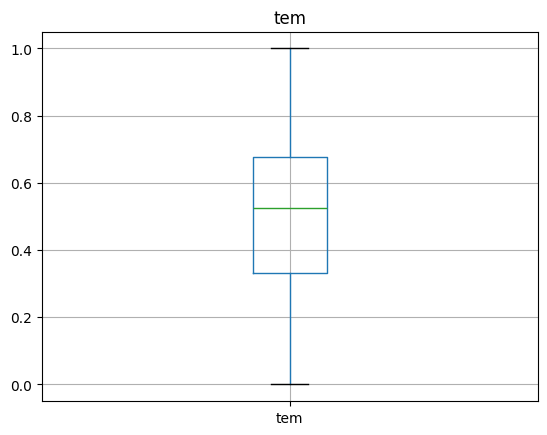

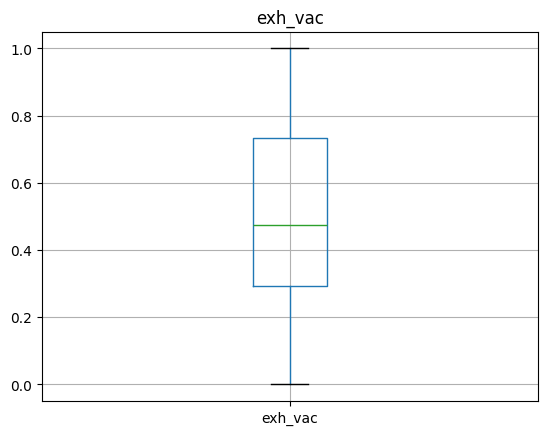

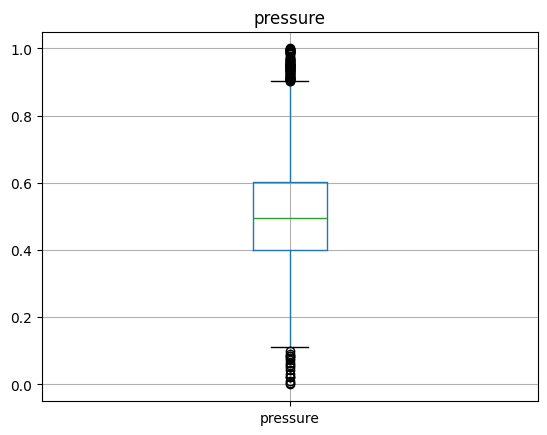

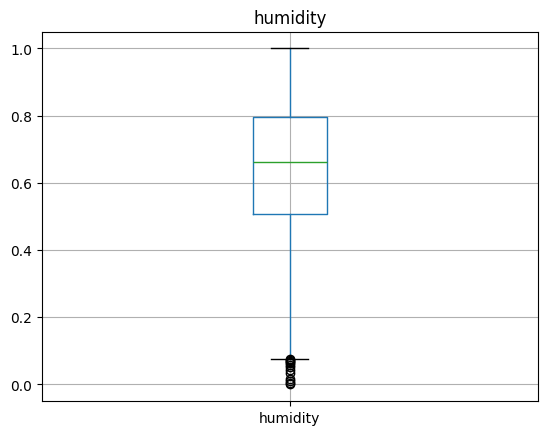

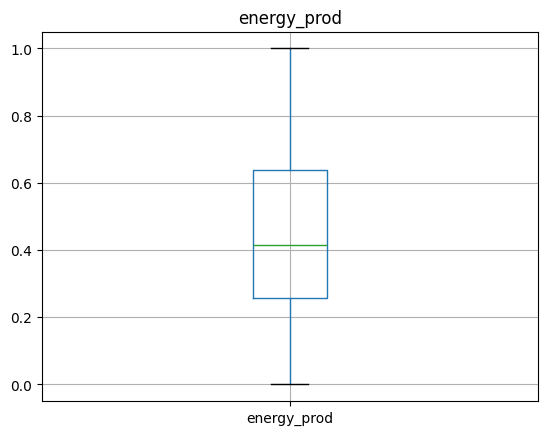

In [31]:
for feature in continuous_feature:
    data=data.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [32]:
import seaborn as sns

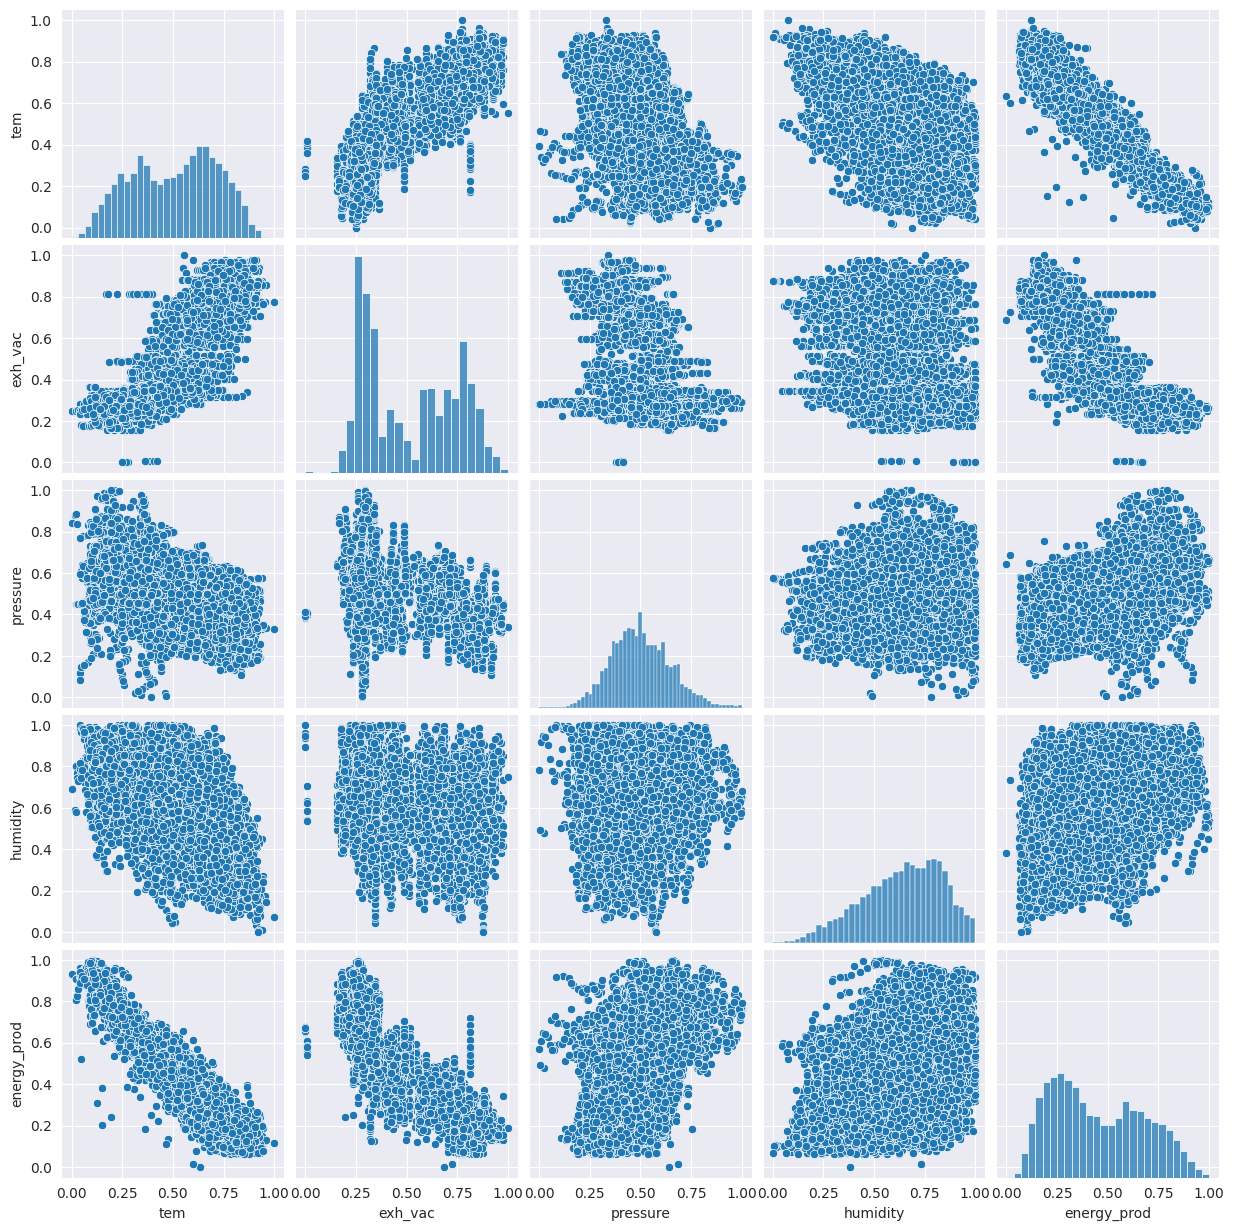

In [33]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [34]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)].dropna()

# Remove outliers from the dataset
cd = remove_outliers_iqr(data)

# Display the cleaned dataset
print("Cleaned Data:")
print(cd)

Cleaned Data:
           tem   exh_vac  pressure  humidity  energy_prod
0     0.220397  0.234875  0.596882  0.463003     0.808477
1     0.289802  0.302135  0.663945  0.926408     0.597351
2     0.341643  0.350890  0.780252  0.752413     0.598940
3     0.337394  0.514947  0.618659  0.717426     0.619735
4     0.377620  0.432028  0.764415  0.662735     0.573775
...        ...       ...       ...       ...          ...
9563  0.433144  0.432918  0.312794  0.754155     0.490861
9564  0.649292  0.711388  0.557535  0.365147     0.353113
9565  0.811048  0.549466  0.304380  0.411260     0.120265
9566  0.600283  0.724021  0.685969  0.733646     0.017351
9567  0.451558  0.425089  0.692155  0.510858     0.452318

[9423 rows x 5 columns]


# Feature Selection

In [35]:
X=cd.drop(["energy_prod"], axis=1)
y=cd["energy_prod"]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_regression

In [38]:
# Lasso (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
selected_features_lasso = X.columns[np.abs(lasso_model.coef_) > 0]
print("Selected features using Lasso:", selected_features_lasso)

Selected features using Lasso: Index([], dtype='object')


In [39]:
from sklearn.linear_model import RidgeCV, ElasticNetCV

# RidgeCV for feature selection
ridgecv_model = RidgeCV(alphas=[0.01, 0.1, 1.0])  # Specify a range of alpha values to search
ridgecv_model.fit(X_train, y_train)
selected_features_ridge = X.columns[np.abs(ridgecv_model.coef_) > 0]

print("Selected features using RidgeCV:", selected_features_ridge)



Selected features using RidgeCV: Index(['tem', 'exh_vac', 'pressure', 'humidity'], dtype='object')


In [40]:
# ElasticNetCV for feature selection
elasticnetcv_model = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9], alphas=[0.01, 0.1, 1.0]) 
elasticnetcv_model.fit(X_train, y_train)
selected_features_elasticnet = X.columns[np.abs(elasticnetcv_model.coef_) > 0]

print("Selected features using ElasticNetCV:", selected_features_elasticnet)


Selected features using ElasticNetCV: Index(['tem', 'exh_vac', 'pressure'], dtype='object')


In [41]:
# Recursive Feature Elimination
rfe_model = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe_model.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe_model.support_]
print("Selected features using recursive feature elimination:", selected_features_rfe)


Selected features using recursive feature elimination: Index(['tem', 'exh_vac', 'humidity'], dtype='object')


In [42]:
# Information Gain
info_gain_selector = SelectKBest(mutual_info_regression, k=3)
info_gain_selector.fit(X_train, y_train)
selected_features_info_gain = X.columns[info_gain_selector.get_support()]
print("Selected features using information gain:", selected_features_info_gain)

Selected features using information gain: Index(['tem', 'exh_vac', 'pressure'], dtype='object')


In [43]:
# Select common features
common_features = ['tem', 'exh_vac', 'pressure']

X = data[common_features]  # Use common_features identified earlier
y = data['energy_prod']  # Assuming 'energy_production' is the target variable

# Ensure the number of samples is consistent
assert len(X) == len(y), "Number of samples in features and labels are not consistent"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Now proceed with building and evaluating the model as before

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract the common features from the dataset
X_selected = data[common_features]

# Split data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

# Build and train the model
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.004242257276457976


# Preparing MLR using OLS

In [45]:
import statsmodels.formula.api as smf 

model_1 = smf.ols(formula='energy_prod~tem+exh_vac+pressure' , data=data).fit()

In [46]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            energy_prod   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        11:09:34   Log-Likelihood:                 12565.
No. Observations:                9527   AIC:                        -2.512e+04
Df Residuals:                    9523   BIC:                        -2.509e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9218      0.004    231.917      0.000       0.914       0.930
tem           -0.7629      0.006   -123.291      0.000      -0.775      -0.751
exh_vac       -0.2459      0.005    -44.910      0.000      -0.257      -0.235
pressure       0.0831      0.005     15.860      0.000       0.073       0.093
==============================================================================
Omnibus:                      541.441   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1907.095
Skew:                          -0.195   Prob(JB):                         0.00
Kurtosis:                       5.157   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model_1.params

Intercept    0.921816
tem         -0.762937
exh_vac     -0.245852
pressure     0.083106
dtype: float64

# Calculating VIF

In [48]:
rsq_tem = smf.ols('tem~exh_vac+pressure+humidity',data=data).fit().rsquared  
vif_tem = 1/(1-rsq_tem) 

rsq_exh_vac = smf.ols('exh_vac~pressure+humidity+tem',data=data).fit().rsquared  
vif_exh_vac = 1/(1-rsq_exh_vac) 

rsq_pressure = smf.ols('pressure~tem+exh_vac+humidity',data=data).fit().rsquared  
vif_pressure = 1/(1-rsq_pressure) 

rsq_humidity = smf.ols('humidity~tem+exh_vac+pressure',data=data).fit().rsquared  
vif_humidity= 1/(1-rsq_humidity) 

# Storing vif values in a data frame
d1 = {'Variables':['tem','exh_vac','pressure','humidity'],'VIF':[vif_tem,vif_exh_vac,vif_pressure,vif_humidity]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,tem,5.968554
1,exh_vac,3.935221
2,pressure,1.451793
3,humidity,1.709384


# Residual Analysis

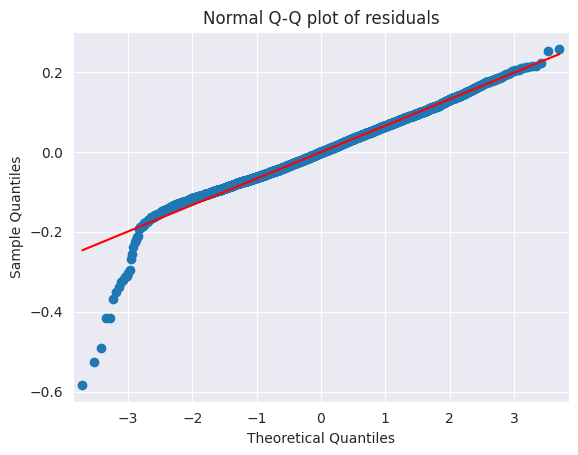

In [49]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') # line = 45 deg. to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [50]:
np.where(model_1.resid>10)

(array([], dtype=int64),)

In [51]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

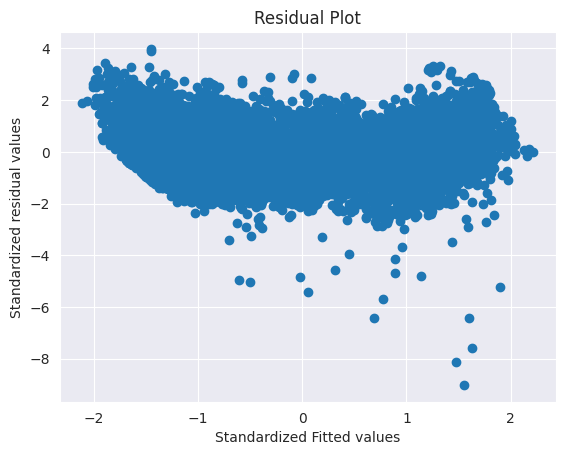

In [52]:
plt.scatter(get_standardized_values(model_1.fittedvalues),
            get_standardized_values(model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

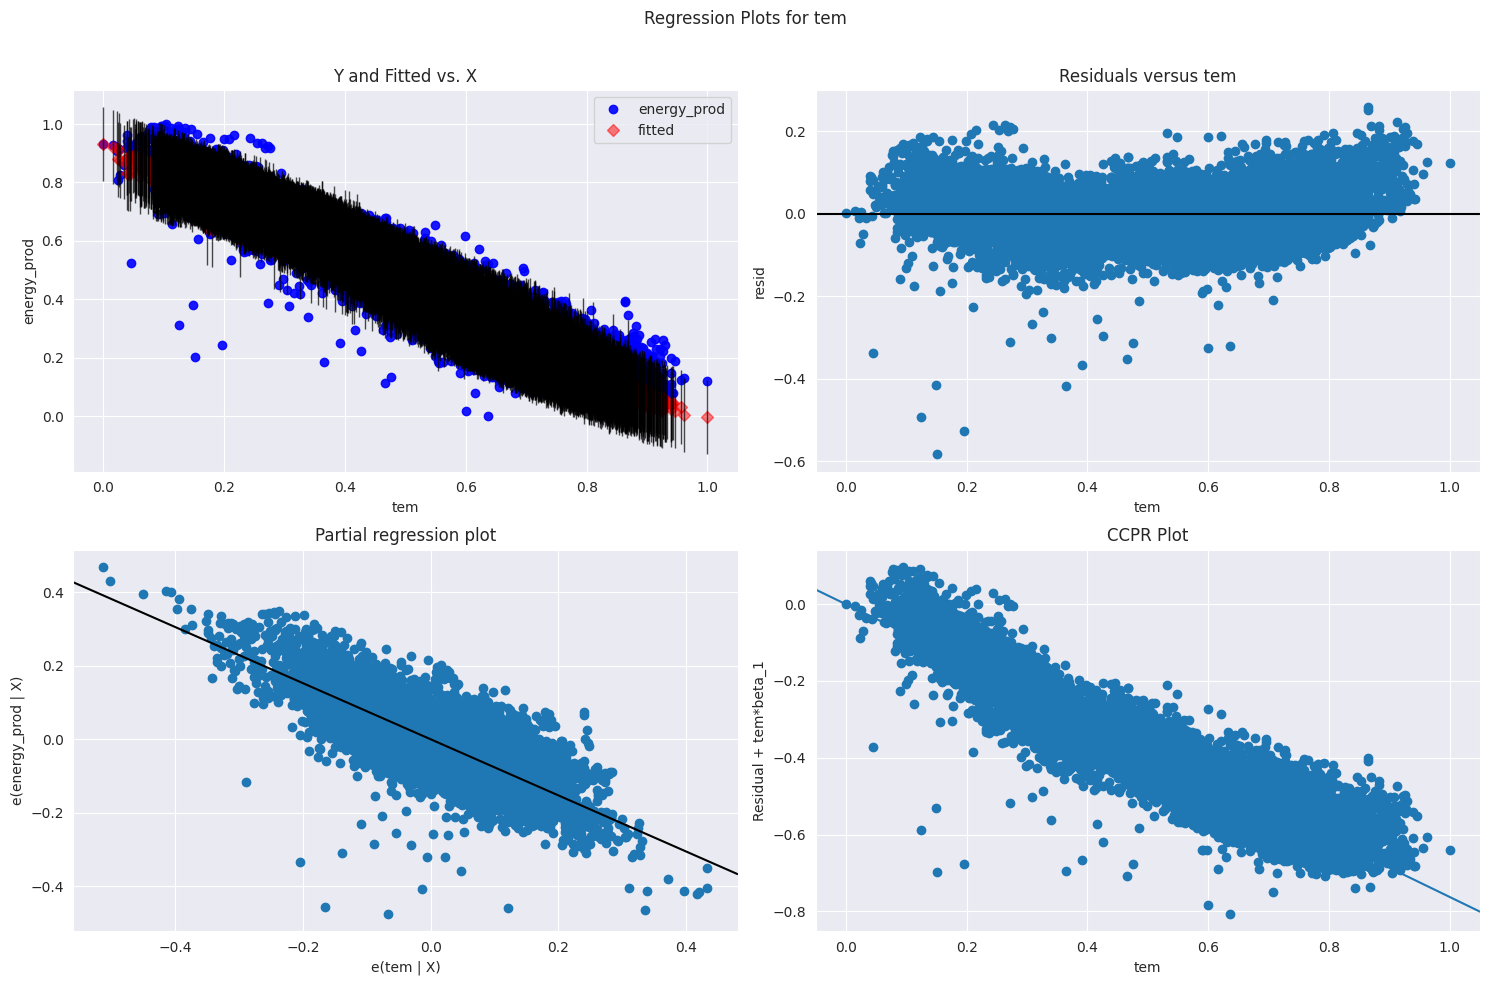

In [53]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_1, "tem", fig=fig)
plt.show()

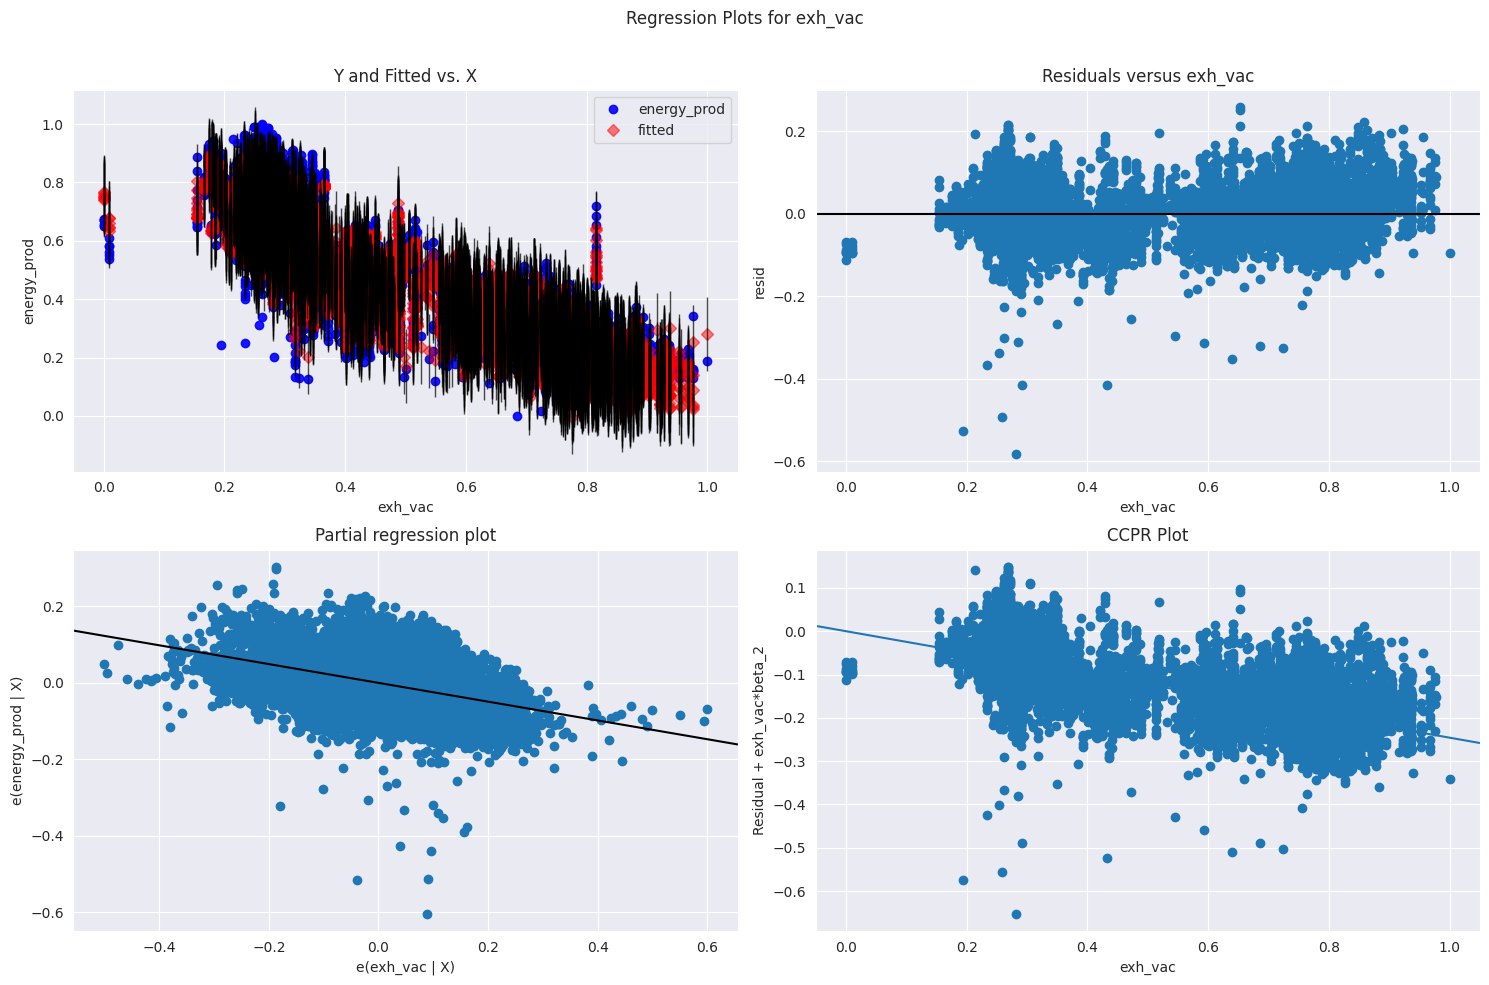

In [54]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_1, "exh_vac", fig=fig)
plt.show()

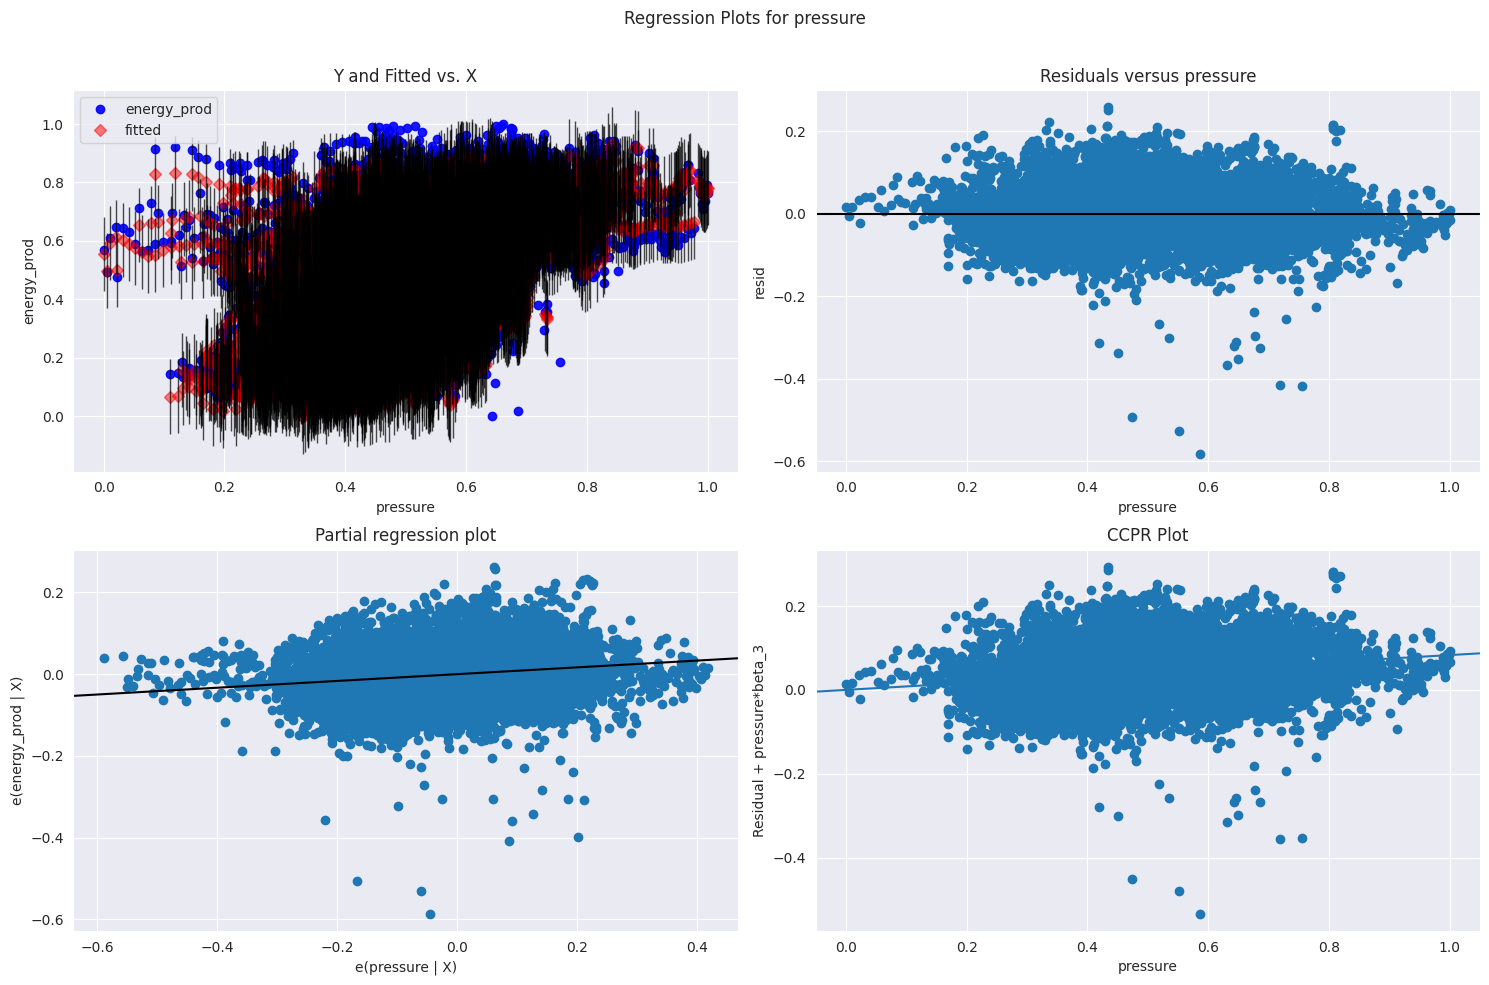

In [55]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_1, "pressure", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Cook’s Distance

In [56]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
model_influence = model_1.get_influence()
(c, _) = model_influence.cooks_distance

In [57]:
(c, _) = model_1.get_influence().cooks_distance

In [58]:
model_1.get_influence().cooks_distance

(array([7.12010478e-05, 1.11910272e-04, 4.82215900e-05, ...,
        2.50581094e-04, 3.36121842e-03, 1.14382718e-04]),
 array([0.99999999, 0.99999997, 1.        , ..., 0.99999987, 0.9999775 ,
        0.99999997]))

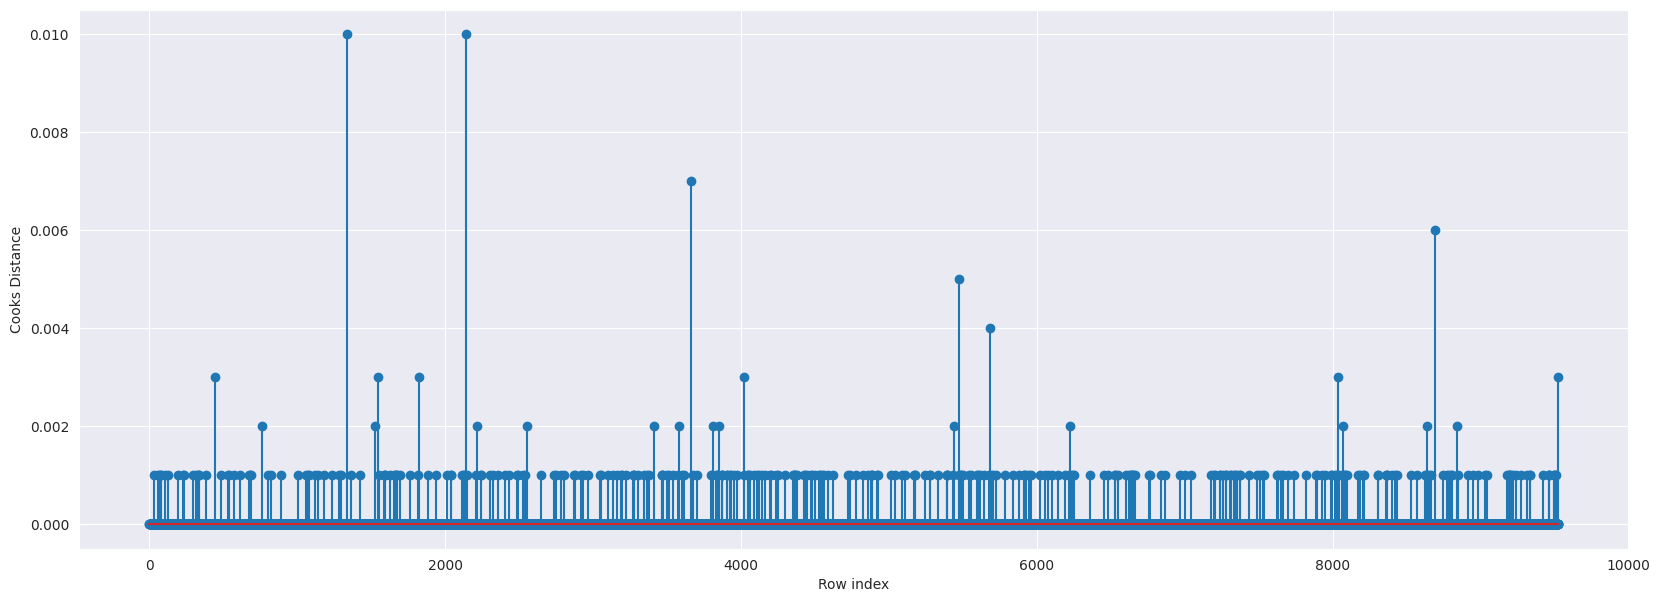

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(1339, 0.009870413660373828)

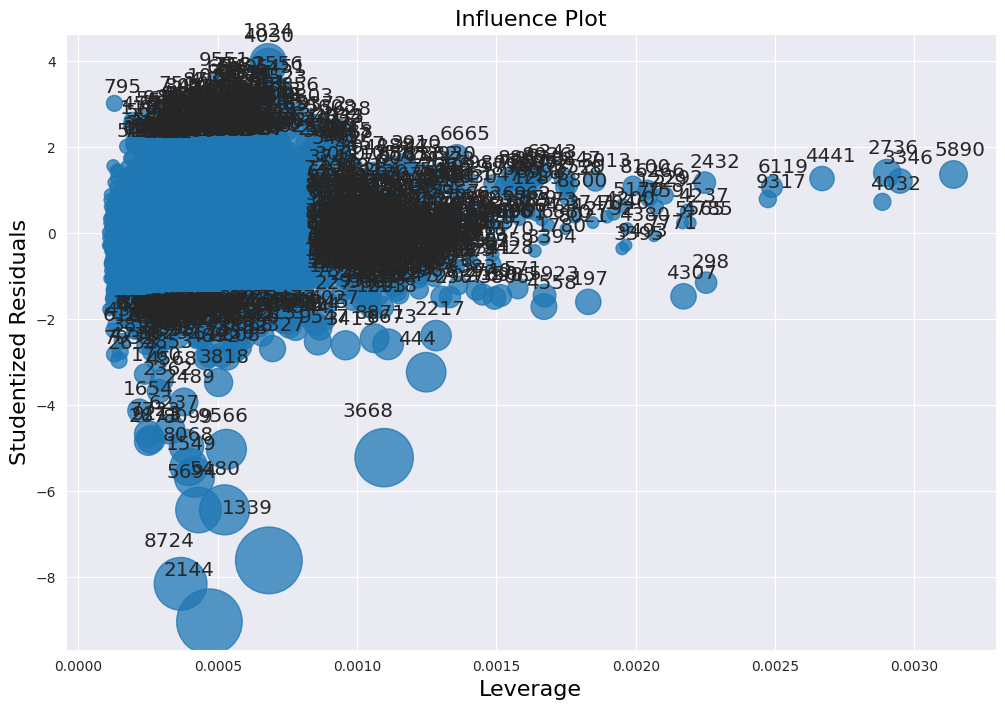

In [61]:


# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(12,8))
fig=influence_plot(model_1,ax = ax)

In [62]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.0018893670620342186

### From the above plot, it is evident that points beyond leverage cutoff value=0.001889 are the outliers

In [63]:
print("R-squared:", model_1.rsquared)
print("Adjusted R-squared:", model_1.rsquared_adj)

R-squared: 0.9177822888000219
Adjusted R-squared: 0.9177563880194275


# Preparing MLR after spliting the data

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure']]
y = data['energy_prod']

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [67]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
     

LinearRegression()

In [68]:
# Make predictions on the testing set
y_pred_2 = model_2.predict(X_test)

In [69]:
# Evaluate model performance
model_2_mse = mean_squared_error(y_test, y_pred_2)
model_2_rmse = np.sqrt(mse)
model_2_r2 = r2_score(y_test, y_pred_2)

In [70]:
print("Mean Squared Error:", model_2_mse)
print("Root Mean Squared Error:", model_2_rmse)
print("R-squared:", model_2_r2)

Mean Squared Error: 0.004310852215504536
Root Mean Squared Error: 0.06513261300192075
R-squared: 0.9163435310087553


# Using PCA MODEL

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [72]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure', 'humidity']]
y = data['energy_prod']

In [73]:
data.columns

Index(['tem', 'exh_vac', 'pressure', 'humidity', 'energy_prod'], dtype='object')

In [74]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [76]:
# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.61023011 0.22680402 0.13727706 0.02568881]


In [77]:
# Decide on the number of components to retain based on explained variance
# You can also specify the number of components explicitly if desired
n_components = 2  # Example: Retain the first 2 principal components

In [78]:
# Retain the specified number of principal components
X_pca_selected = X_pca[:, :n_components]

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_selected, y, test_size=0.2, random_state=7)

In [80]:
# Fit a regression model (e.g., Linear Regression) using the principal components
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression()

In [81]:
# Make predictions on the testing set
y_pred_3 = model_3.predict(X_test)

In [82]:
# Evaluate model performance
model_3_mse = mean_squared_error(y_test, y_pred_3)
model_3_rmse = np.sqrt(mse)
model_3_r2 = r2_score(y_test, y_pred_3)

In [83]:
print("Mean Squared Error:", model_3_mse)
print("Root Mean Squared Error:", model_3_rmse)
print("R-squared:", model_3_r2)

Mean Squared Error: 0.007922083637402964
Root Mean Squared Error: 0.06513261300192075
R-squared: 0.8462639146443385


# Using Decision Tree Regression

In [84]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure']]
y = data['energy_prod']

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [86]:
from sklearn.tree import DecisionTreeRegressor
model_4 = DecisionTreeRegressor(random_state = 0)
model_4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [87]:
# Make predictions on the testing set
y_pred_4 = model_4.predict(X_test)

In [88]:
# Evaluate model performance
model_4_mse = mean_squared_error(y_test, y_pred_4)
model_4_rmse = np.sqrt(mse)
model_4_r2 = r2_score(y_test, y_pred_4)

In [89]:
print("Mean Squared Error:", model_4_mse)
print("Root Mean Squared Error:", model_4_rmse)
print("R-squared:", model_4_r2)

Mean Squared Error: 0.0042231604525914766
Root Mean Squared Error: 0.06513261300192075
R-squared: 0.9180452788020429


# Using Polynomial Regression

In [90]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure']]
y = data['energy_prod']

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
model_5 = LinearRegression()
model_5.fit(X_poly, y_train)

LinearRegression()

In [93]:
# Make predictions on the testing set
y_pred_5 = model_5.predict(poly_reg.transform(X_test))

In [94]:
# Evaluate model performance
model_5_mse = mean_squared_error(y_test, y_pred_5)
model_5_rmse = np.sqrt(mse)
model_5_r2 = r2_score(y_test, y_pred_5)

In [95]:
print("Mean Squared Error:", model_5_mse)
print("Root Mean Squared Error:", model_5_rmse)
print("R-squared:", model_5_r2)

Mean Squared Error: 0.003603058627518174
Root Mean Squared Error: 0.06513261300192075
R-squared: 0.9300789850177378


# Using Random Forest Regression

In [96]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure']]
y = data['energy_prod']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [98]:
from sklearn.ensemble import RandomForestRegressor
model_6 = RandomForestRegressor(n_estimators = 10, random_state = 0)
model_6.fit(X_train, y_train)
     

RandomForestRegressor(n_estimators=10, random_state=0)

In [99]:
# Make predictions on the testing set
y_pred_6 = model_6.predict(X_test)

In [100]:
# Evaluate model performance
model_6_mse = mean_squared_error(y_test, y_pred_6)
model_6_rmse = np.sqrt(mse)
model_6_r2 = r2_score(y_test, y_pred_6)

In [101]:
print("Mean Squared Error:", model_6_mse)
print("Root Mean Squared Error:", model_6_rmse)
print("R-squared:", model_6_r2)

Mean Squared Error: 0.0024825518624226346
Root Mean Squared Error: 0.06513261300192075
R-squared: 0.951823557729267


# Using Support Vector Regression (SVR)

In [102]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure']]
y = data['energy_prod']

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [104]:
from sklearn.svm import SVR
model_7 = SVR(kernel = 'rbf')
model_7.fit(X_train, y_train)

SVR()

In [105]:
# Make predictions on the testing set
y_pred_7 = model_7.predict(X_test)

In [106]:
# Evaluate model performance
model_7_mse = mean_squared_error(y_test, y_pred_7)
model_7_rmse = np.sqrt(mse)
model_7_r2 = r2_score(y_test, y_pred_7)

In [107]:
print("Mean Squared Error:", model_7_mse)
print("Root Mean Squared Error:", model_7_rmse)
print("R-squared:", model_7_r2)

Mean Squared Error: 0.0037177803881505212
Root Mean Squared Error: 0.06513261300192075
R-squared: 0.9278526926441688


# Using XGBoost Model

In [108]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure']]
y = data['energy_prod']

In [109]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [110]:
import xgboost as xgb

In [111]:
model_8 = xgb.XGBRegressor(random_state=0)
model_8.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [112]:
# Make predictions on the testing set
y_pred_8 = model_8.predict(X_test)

In [113]:
# Evaluate model performance
model_8_mse = mean_squared_error(y_test, y_pred_8)
model_8_rmse = np.sqrt(mse)
model_8_r2 = r2_score(y_test, y_pred_8)

In [114]:
print("Mean Squared Error:", model_8_mse)
print("Root Mean Squared Error:", model_8_rmse)
print("R-squared:", model_8_r2)

Mean Squared Error: 0.0019845882081315183
Root Mean Squared Error: 0.06513261300192075
R-squared: 0.9614870485940532


# Table of Model Accuracy

In [115]:
table=pd.DataFrame({'Name of Model':['MLR using OLS','MLR after Spliting','PCA','Decision Tree','Polynomial Regression','Random Forest','SVR','XGBoost'],'Prep_Models':['model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],'Rsquared':[model_1.rsquared,model_2_r2,model_3_r2,model_4_r2,model_5_r2,model_6_r2,model_7_r2,model_8_r2]})
table

,Name of Model,Prep_Models,Rsquared
0,MLR using OLS,model_1,0.917782
1,MLR after Spliting,model_2,0.916344
2,PCA,model_3,0.846264
3,Decision Tree,model_4,0.918045
4,Polynomial Regression,model_5,0.930079
5,Random Forest,model_6,0.951824
6,SVR,model_7,0.927853
7,XGBoost,model_8,0.961487


### From the above table, it is clear that XGBoost model is the best model for the given dataset. It gives 96.14% accuracy.

In [116]:
import pickle

with open('model_8.pkl', 'wb') as model_file:
    pickle.dump(model_8, model_file)

print("Model saved successfully to 'model_8.pkl'.")

Model saved successfully to 'model_8.pkl'.
